# Minimal network motifs: Negative feedback loop

Negative feedback loops are ubiquitous in biology. For instance: 40% of known E. coli transcription factors negatively regulate themselves. Many key properties of mammalian cells are governed by a negative feedback (stress response, growth, proliferation…)

A negative feedback loop is formed when the product of transcription represses directly or indirectly the expression of its own mRNA.  The most simple example of nonlinear negative feedback is a protein that directly represes the prodction of its own mRNA. Based on the model of the Central Dogma, the set of interactions that we will take into account are: 

In other words, and using the previous notation, we will use a gene that encodes the mRNA [M] of a protein [P] that acts as its own transcriptional repressor [T]. We will modify the equations for the Central Dogma to change T by P as a repressor (so, we have to remember to use the Hill function for repression).

$$
\begin{matrix}
\Psi (K,P,n) &\overset{α_M}{\longrightarrow}& M & \tag{1} \\ 
M &\overset{\gamma_M}{\longrightarrow}& 0 & \\
M &\overset{\alpha_P}{\longrightarrow}& P  & \\
P &\overset{\gamma_P}{\longrightarrow}& 0 &\\
\end{matrix}
$$

where $\Psi (K,P,n)$ is the Hill Function for represors, using `P` as transcription factor, with a half maximal concentration `K` and cooperativity `n`: 

$$
\begin{align*}
\Psi (K,P,n) &=  \frac{[K]^n}{K^n+[P]^n} \tag{2}
\end{align*}
$$

Based on the formalism of Mass Action, this interactions are captured by the following set of differential equations: 

$$
\begin{align*}
\frac{\mathrm{d} [M]}{\mathrm{d} t} &=  \alpha_m \frac{K^n}{K^n+[P]^n}-\gamma_M[M] \tag{3}\\ 
\frac{\mathrm{d} [P]}{\mathrm{d} t} &=  \alpha_P [M]-\gamma_P[P] \tag{4}
\end{align*}
$$

We will start by building the ODE problem for this negative regulation and compare its dynamical properties with a linear system, where the repression is performed by another protein `T`, such as:

$$
\begin{align*}
\frac{\mathrm{d} [M]}{\mathrm{d} t} &=  \alpha_m \frac{K^n}{K^n+[T]^n}-\gamma_M[M] \tag{5}\\ 
\frac{\mathrm{d} [P]}{\mathrm{d} t} &=  \alpha_P [M]-\gamma_P[P] \tag{6}
\end{align*}
$$

In [2]:
using Plots; gr()
using DifferentialEquations
using ParameterizedFunctions

In [3]:
NegativeFeedback! = @ode_def negFB begin
   dM = -γ_M*M+α_M*K^n/(K^n +P^n)
   dP =   α_P * M - γ_P * P
    end α_M γ_M T n α_P γ_P K

(::negFB{var"#3#7",var"#4#8",var"#5#9",Nothing,Nothing,var"#6#10",Expr,Expr}) (generic function with 2 methods)

In [4]:
NoFeedback! = @ode_def ab begin
   dM = -γ_M*M+α_M*K^n/(K^n +T^n)
   dP =   α_P * M - γ_P * P
    end α_M γ_M T n α_P γ_P K

(::ab{var"#11#15",var"#12#16",var"#13#17",Nothing,Nothing,var"#14#18",Expr,Expr}) (generic function with 2 methods)

### Negative feedback loops show faster responses compared to linear networks
We start by comparing the simples case, of Hill coefficient `n=1`. We will set the value of transcription factor `T` as the steady state value of the protein `P`, in order to maintain the same input intensity of the transcription.  We can see that the steady state is reached faster when proteins are inside a negative feedback loop. 

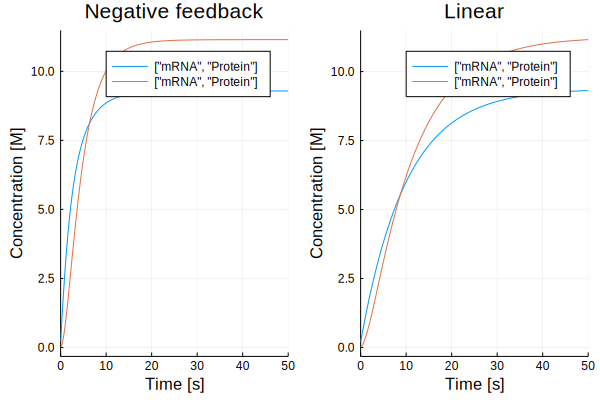

In [5]:
u₀ = [0.2,0.01]
n=1
K=5
D=1
T=11
km=3
α_M=km*D
γ_M=0.1
α_P=0.6
γ_P=0.5
p=[α_M,γ_M,T,n,α_P,γ_P,K];
tspan = (0.0,50.0)

prob1 = ODEProblem(NegativeFeedback!,u₀,tspan,p)
prob2 = ODEProblem(NoFeedback!,u₀,tspan,p)

sol1 = solve(prob1)
P1=plot(sol1,label=["mRNA","Protein"])
title!("Negative feedback")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

sol2 = solve(prob2)
P2=plot(sol2,label=["mRNA","Protein"])
title!("Linear")
xlabel!("Time [s]")
ylabel!("Concentration [M]")

plot(P1,P2,layout=(1,2),legend=true)

### Negative feedback loops add robustness against changes in a parameter 

Robustness against changes in a parameters is often a desired characteristic of a networks. Imagine that the important cell decision has to be made (division or no division, differentiation or no differentiation, apoptosis or no apoptosis ). Negative feedback loops provide a natural way of reducing the dependence of the output of a networks on changes in the intensity of the input. To test this in our numerical model, we will change in a loop the degradation of the mRNA protein, and compare how much the output, in terms of protein levels, changes as the parameter changes. 

In [6]:
function NegativeFeedbackFunction(α)
     p=[α_M,α,T,n,α_P,γ_P,K];
     prob1 = ODEProblem(NegativeFeedback!,u₀,tspan,p)    
     x=("gamma_M = $(α)")
     sol1 = solve(prob1)
     P1=plot!(sol1,vars=(1),label=x)
end

NegativeFeedbackFunction (generic function with 1 method)

In [7]:
function LinearFunction(α)
     p=[α_M,α,T,n,α_P,γ_P,K];
     prob2 = ODEProblem(NoFeedback!,u₀,tspan,p)
     x=("gamma_M = $(α)")
     sol2 = solve(prob2)
     P2=plot!(sol2,vars=(1),label=x)
end

LinearFunction (generic function with 1 method)

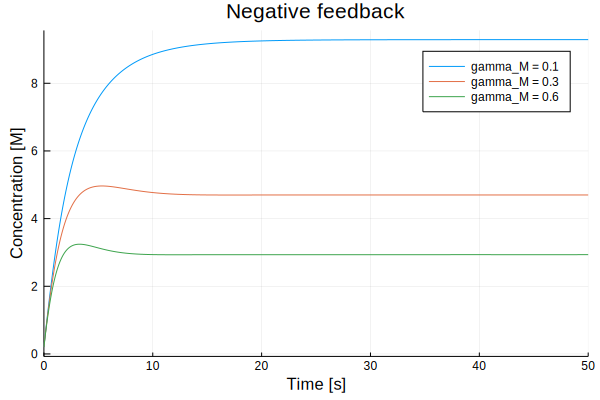

In [8]:
u₀ = [0.2,0.01]
tspan = (0.0,50.0)
plot()
for i in [0.1,0.3,0.6]
    NegativeFeedbackFunction(i)
end
 title!("Negative feedback")
 xlabel!("Time [s]")
 ylabel!("Concentration [M]")

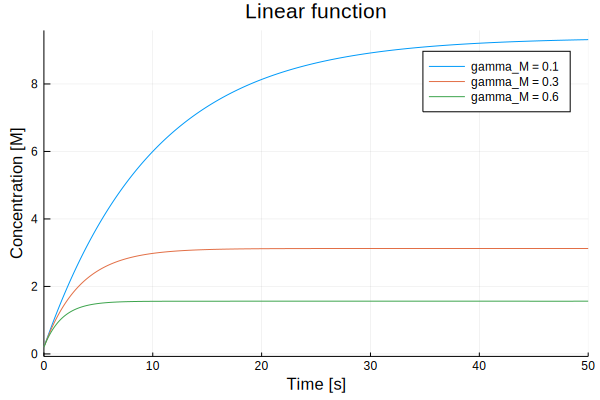

In [9]:
u₀ = [0.2,0.01]
tspan = (0.0,50.0)
plot()
for i in [0.1,0.3,0.6]
    LinearFunction(i)

end
 title!("Linear function")
  xlabel!("Time [s]")
  ylabel!("Concentration [M]")

Now we will perform the same study of robustness, but changing the parameter `K`

In [10]:
function NegativeFeedbackFunction(K)
     p=[α_M,γ_M,T,n,α_P,γ_P,K];
    
    prob1 = ODEProblem(NegativeFeedback!,u₀,tspan,p)
    prob2 = ODEProblem(NoFeedback!,u₀,tspan,p)
    
     x=("K = $(K)")
    
     sol1 = solve(prob1)
     P1=plot!(sol1,vars=(1),label=x,ylims = (0,20))
     title!("Negative feedback")
     xlabel!("Time [s]")
     ylabel!("Concentration [M]")
end

function LinearFunction(K)
     p=[α_M,γ_M,T,n,α_P,γ_P,K];
    
    prob1 = ODEProblem(NegativeFeedback!,u₀,tspan,p)
    prob2 = ODEProblem(NoFeedback!,u₀,tspan,p)
    
     x=("K = $(K)")
    
     sol2 = solve(prob2)
     P2=plot!(sol2,vars=(1),label=x,ylims = (0,20))
     title!("Negative feedback")
     xlabel!("Time [s]")
     ylabel!("Concentration [M]")
end


LinearFunction (generic function with 1 method)

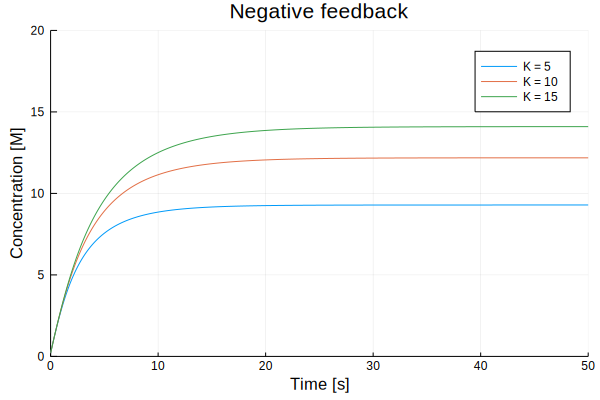

In [11]:
u0 = [0.2,0.01]
tspan = (0.0,50.0)
plot()
for i in [5,10,15]
    NegativeFeedbackFunction(i)

end
 title!("Negative feedback")

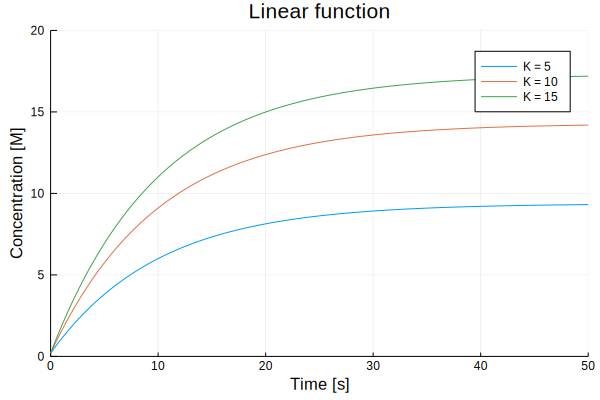

In [12]:
u₀ = [0.2,0.01]
tspan = (0.0,50.0)
plot()
for i in [5,10,15]
    LinearFunction(i)

end
 title!("Linear function")

## Negative feedback can be used in conditions of high cooperativity  

In gene regulatory networks, the level of mRNA produced is proportional to the amount of transcription factor available. When the transcription factor acts cooperatively, i.e., several monomers are required to activate the signal, the output of the system is reduced. To overcome this, the negative provides a  way of overcoming this limitation. As we can see, the linear system requires a much higher amount of transcription factor, when cooperativity is added to the system. 


In [13]:
function NegativeFeedbackFunction(n)
     p=[α_M,γ_M,T,n,α_P,γ_P,K];
    
    prob1 = ODEProblem(NegativeFeedback!,u₀,tspan,p)
    prob2 = ODEProblem(NoFeedback!,u₀,tspan,p)
    
     x=("n = $(n)")
    
     sol1 = solve(prob1)
     P1=plot!(sol1,vars=(1),label=x,ylims = (0,20))
     title!("Negative feedback")
     xlabel!("Time [s]")
     ylabel!("Concentration [M]")
end

function LinearFunction(n)
     p=[α_M,γ_M,T,n,α_P,γ_P,K];
    
    prob1 = ODEProblem(NegativeFeedback!,u₀,tspan,p)
    prob2 = ODEProblem(NoFeedback!,u₀,tspan,p)
    
     x=("n = $(n)")
    
     sol2 = solve(prob2)
     P2=plot!(sol2,vars=(1),label=x,ylims = (0,20))
     title!("Negative feedback")
     xlabel!("Time [s]")
     ylabel!("Concentration [M]")
end

LinearFunction (generic function with 1 method)

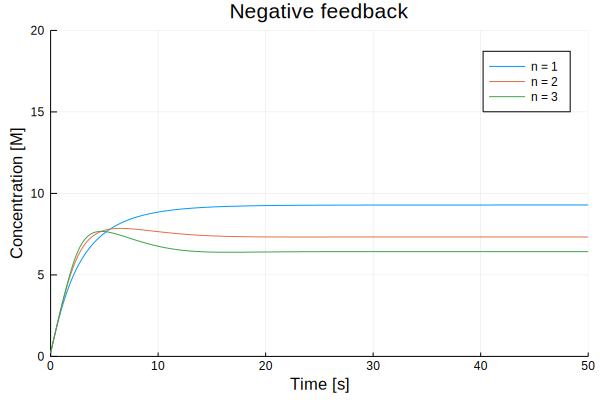

In [14]:
u₀ = [0.2,0.01]
n=1
K=5
D=1
T=11
km=3
α_M=km*D
γ_M=0.1
α_P=0.6
γ_P=0.5
p=[α_M,γ_M,T,n,α_P,γ_P,K];
tspan = (0.0,50.0)
plot()
for i in [1,2,3]
    NegativeFeedbackFunction(i)

end
 title!("Negative feedback")

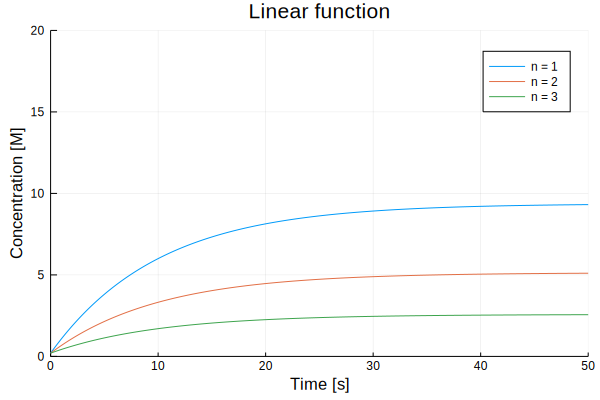

In [15]:
u₀ = [0.2,0.01]
tspan = (0.0,50.0)
plot()
for i in [1,2,3]
    LinearFunction(i)

end
 title!("Linear function")

## Negative feedback can generate a short pulse of protein 

Often times, signals are not required to be continuous, but only last a short amount of time. When cooperativity is high, we can see that a pulse in the production of protein is added. 


In [16]:
function NegativeFeedbackFunction(n)
     p=[α_M,γ_M,T,n,α_P,γ_P,K];
    
    prob1 = ODEProblem(NegativeFeedback!,u₀,tspan,p)
    prob2 = ODEProblem(NoFeedback!,u₀,tspan,p)
    
     x=("n = $(n)")
    
     sol1 = solve(prob1)
     P1=plot!(sol1,vars=(1),label=x,ylims = (0,20))
     title!("Negative feedback")
     xlabel!("Time [s]")
     ylabel!("Concentration [M]")
end

function LinearFunction(n)
     p=[α_M,γ_M,T,n,α_P,γ_P,K];
    
    prob1 = ODEProblem(NegativeFeedback!,u₀,tspan,p)
    prob2 = ODEProblem(NoFeedback!,u₀,tspan,p)
    
     x=("n = $(n)")
    
     sol2 = solve(prob2)
     P2=plot!(sol2,vars=(1),label=x,ylims = (0,20))
     title!("Negative feedback")
     xlabel!("Time [s]")
     ylabel!("Concentration [M]")
end

LinearFunction (generic function with 1 method)

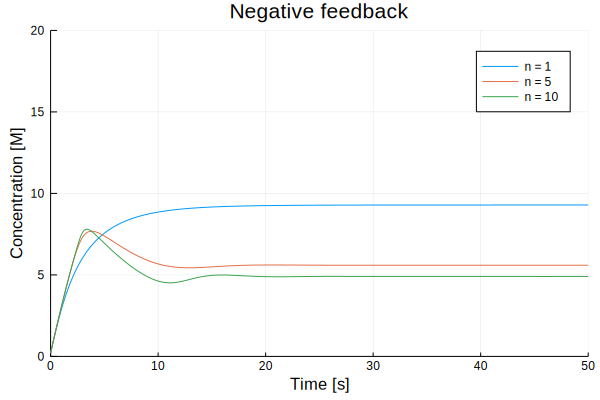

In [17]:
u₀ = [0.2,0.01]
n=1
K=5
D=1
T=11
km=3
α_M=km*D
γ_M=0.1
α_P=0.6
γ_P=0.5
p=[α_M,γ_M,T,n,α_P,γ_P,K];
tspan = (0.0,50.0)
plot()
for i in [1,5,10]
    NegativeFeedbackFunction(i)

end
 title!("Negative feedback")

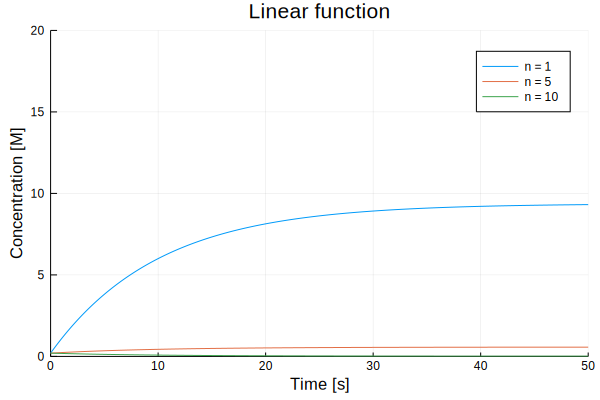

In [18]:
u₀ = [0.2,0.01]
tspan = (0.0,50.0)
plot()
for i in [1,5,10]
    LinearFunction(i)

end
 title!("Linear function")

## Negative feedback induces stability against noise 

Biological systems are quite often very noisy and have a strong stochastic component. Often times, this variability is used as an advantage (selection, survival...). Other times, the system needs to produce a robust and reliable output (for instance, stem cell differentiation) so, noise is not a desired property of an input signal. Therefore, in order to make the correct decision, biology has engineered several workarounds that allow a robust behavior in conditions of signals with a strong stochastic component.  The most common way to reduce the effect of noise is a negative feedback.  Here we will add noise to a linear and nonlinear network motif, and observe how noise is propagated into the output of the system.  

We will define a function to add additive noise into all variables of a system of differential equations in the following general formulation

$$
du=f(u,p,t)dt+g(u,p,t)dW
$$

Solving `SDEs` is done in the same way as `ODEs` in Julia. In the case of additive noise, `g` is simply a matrix of values. The simplest case is diagonal noise, where g is a diagonal matrix, with components $\lambda_i$. This means that every function in the system gets a different random number of similar amplitude. We simply define both `f` and `g` as in-place functions. Thus `f(du,u,p,t)` gives the deterministic change, and `g(du,u,p,t)` gives the stochastic portion of the equation. This way, the amplitude of noise is defined as $\lambda_i$ *N(0,dt) where `N` is the normal distribution.

The general formulation for `SDEs` in Julia is the following

`prob = SDEProblem(f!,g!,u₀,tspan,p)`

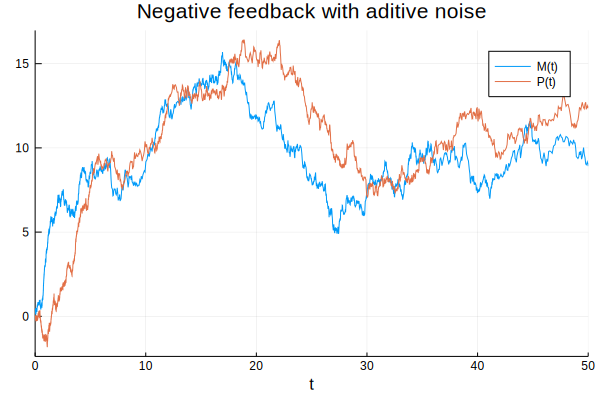

In [19]:
NoiseFunction! = @ode_def negFB begin
   dM = 1
   dP = 1
    end α_M γ_M T n α_P γ_P K

u₀ = [0.2,0.01]
n=1
K=5
D=1
T=11
km=3
α_M=km*D
γ_M=0.1
α_P=0.6
γ_P=0.5
p=[α_M,γ_M,T,n,α_P,γ_P,K];
tspan = (0.0,50.0)

prob6 = SDEProblem(NegativeFeedback!,NoiseFunction!,u₀,tspan,p)
sol6 = solve(prob6)
plot(sol6)
title!("Negative feedback with aditive noise")

To compare the performance of the negative feedback system with the linear systems, we will perform 100 independent simulations and plot the region where 50% of the trajectories reside.

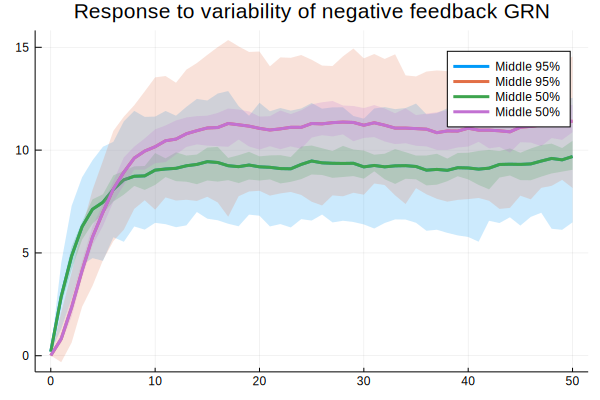

In [20]:
prob7 = MonteCarloProblem(prob6)
sol7 = solve(prob7,trajectories=100);
summ7 = MonteCarloSummary(sol7,0:1:50)
plot(summ7,labels="Middle 95%")
summ8 = EnsembleSummary(sol7,0:1:50;quantiles=[0.35,0.65])
plot!(summ8,labels="Middle 50%",legend=true)
title!("Response to variability of negative feedback GRN")

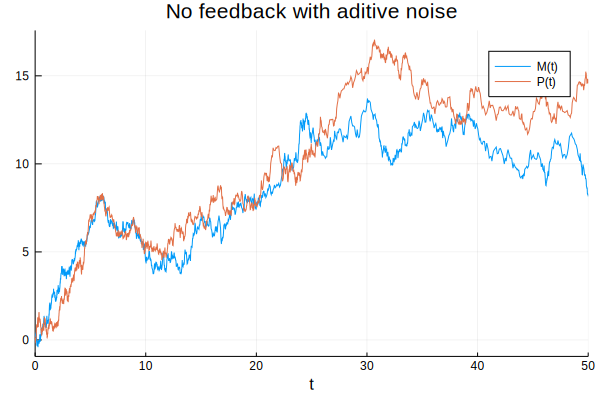

In [21]:
prob8 = SDEProblem(NoFeedback!,NoiseFunction!,u₀,tspan,p)
sol8 = solve(prob8)
plot(sol8)
 title!("No feedback with aditive noise")

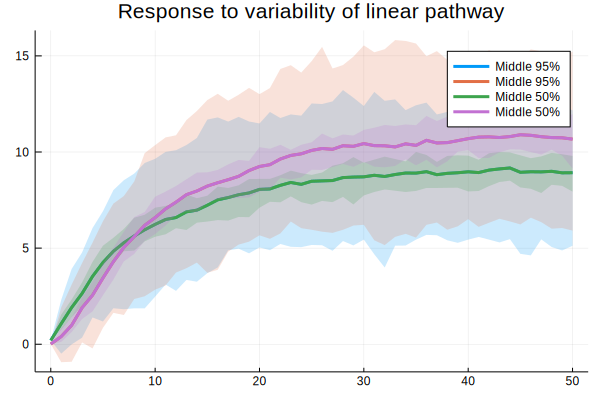

In [22]:
prob9 = MonteCarloProblem(prob8)
sol9 = solve(prob9,trajectories=100);
summ9 = MonteCarloSummary(sol9,0:1:50)
plot(summ9,labels="Middle 95%")
summ10 = EnsembleSummary(sol9,0:1:50;quantiles=[0.35,0.65])
plot!(summ10,labels="Middle 50%",legend=true)
title!("Response to variability of linear pathway")

## Conclusion

We can clearly see that the variability in the output of the linear system is higher in linear networks than in networks with a negative feedback loop. In conclusion, the presence of a protein that represeses directly or indirectly its own production induces the following properties and features in a fene regulatory network:

- Faster dynamics
- Pulses
- Better performance with high cooperativity  
- Stability againts changes in input
- Robustness against noise

### <font color=red>Computer Task:</font>

Choose one of the five features listed above and one parameter of the model. Study how changes in this parameter affect the feature that you have chosen (you need to compare the output of the negative feedback and the linear system).